In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from skimage import io
from os.path import expanduser
from tqdm import tqdm
HOME = expanduser("~")
import os, sys
import SimpleITK as sitk
%load_ext autoreload
%autoreload 2

In [2]:
animal = 'DK39'
DIR = f'/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/{animal}/preps'
INPUT = os.path.join(DIR, 'CH1', 'thumbnail_cleaned')
ELASTIX = os.path.join(DIR, 'elastix')

In [4]:
PATH = '/home/eddyod/programming/pipeline_utility'
sys.path.append(PATH)
from utilities.sqlcontroller import SqlController
from utilities.utilities_registration import (start_plot, end_plot, update_multires_iterations, 
                                              plot_values, command_iteration)


Connecting dklab@192.168.1.12:3306


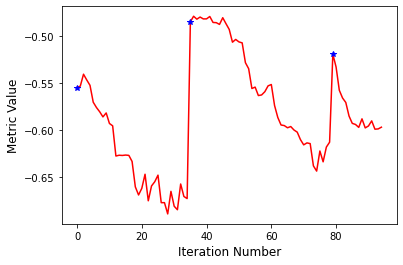

rotation 0.023135898584798864
xshift -69.36813634549918
yshift -52.20457340966194
center [871.  524.5]
Final metric value: -0.5721312635012012
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 16.


In [5]:
# dk39, 124 125 have a lot of shift and rotation
moving_file = os.path.join(INPUT, '126.tif')
fixed_file = os.path.join(INPUT, '125.tif')
moving_image = sitk.ReadImage(moving_file, sitk.sitkUInt16)
fixed_image =  sitk.ReadImage(fixed_file, sitk.sitkUInt16)
finalParameters = final_transform.GetParameters()
fixedParameters = final_transform.GetFixedParameters()
rot_rad, xshift, yshift = finalParameters
center = np.array(fixedParameters)
print('rotation', rot_rad)
print('xshift', xshift)
print('yshift', yshift)
print('center', center)


# Always check the reason optimization terminated.
print('Final metric value: {0}'.format(registration_method.GetMetricValue()))
print('Optimizer\'s stopping condition, {0}'.format(registration_method.GetOptimizerStopConditionDescription()))

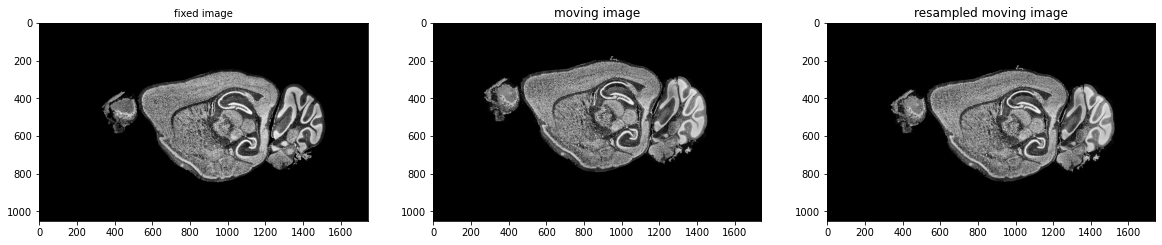

In [6]:
moving_resampled = sitk.Resample(moving_image, fixed_image, final_transform, sitk.sitkLinear, 0.0, moving_image.GetPixelID())
fig = plt.figure(figsize=(20,10))

fig.add_subplot(1,3,1)
plt.imshow(sitk.GetArrayViewFromImage(fixed_image), cmap='gray')
plt.title('fixed image', fontsize=10)

fig.add_subplot(1,3,2)
plt.imshow(sitk.GetArrayViewFromImage(moving_image), cmap='gray')
plt.title('moving image')

fig.add_subplot(1,3,3)
plt.title('resampled moving image')
plt.imshow(sitk.GetArrayViewFromImage(moving_resampled), cmap='gray')
    